In [45]:
import os
import math

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

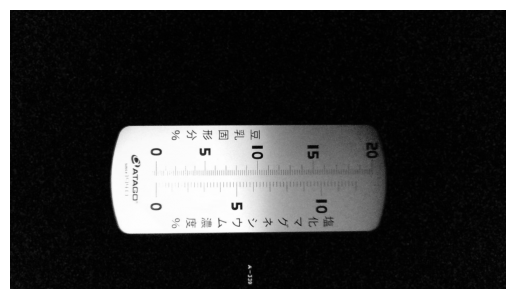

In [46]:
# image_path = os.path.join("images", '7.0', '5', 'WIN_20250515_13_42_56_Pro (2).jpg')
image_path = os.path.join("yolo_run", 'obb_test.jpg')
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [47]:
def find_edges_dot(img, threshold):
    h, w = img.shape
    center_y, center_x = h // 2, w // 2
    results = {}

    # 상단에서 아래
    for y in range(center_y):
        if img[y, center_x] > threshold:
            results['top'] = y
            break
    else: results['top'] = 0

    # 하단에서 위
    for y in range(h - 1, center_y, -1):
        if img[y, center_x] > threshold:
            results['bottom'] = y
            break
    else: results['bottom'] = h - 1

    # 왼쪽에서 오른쪽
    for x in range(center_x):
        if img[center_y, x] > threshold:
            results['left'] = x
            break
    else: results['left'] = 0

    # 오른쪽에서 왼쪽
    for x in range(w - 1, center_x, -1):
        if img[center_y, x] > threshold:
            results['right'] = x
            break
    else: results['right'] = w - 1

    return results

In [48]:
edges = find_edges_dot(gray_img, 50)
print(edges)

{'top': 446, 'bottom': 861, 'left': 402, 'right': 1431}


In [49]:
def find_edges_line(img, hor_threshold, ver_threshold):
    h, w = img.shape
    center_y, center_x = h // 2, w // 2
    results = {}

    # 상단에서 아래
    for y in range(center_y):
        if np.sum(img[y, :]) > hor_threshold:
            results['top'] = y
            break
    else: results['top'] = 0

    # 하단에서 위
    for y in range(h - 1, center_y, -1):
        if np.sum(img[y, :]) > hor_threshold:
            results['bottom'] = y
            break
    else: results['bottom'] = h - 1

    # 왼쪽에서 오른쪽
    for x in range(center_x):
        if np.sum(img[:, x]) > ver_threshold:
            results['left'] = x
            break
    else: results['left'] = 0

    # 오른쪽에서 왼쪽
    for x in range(w - 1, center_x, -1):
        if np.sum(img[:, x]) > ver_threshold:
            results['right'] = x
            break
    else: results['right'] = w - 1

    return results

In [50]:
line_edges = find_edges_line(gray_img, 15000, 20000)
print(line_edges)

{'top': 443, 'bottom': 869, 'left': 392, 'right': 1439}


sum of top edge: 73951
sum of bottom edge: 121133
sum of left edge: 60063
sum of right edge: 24756


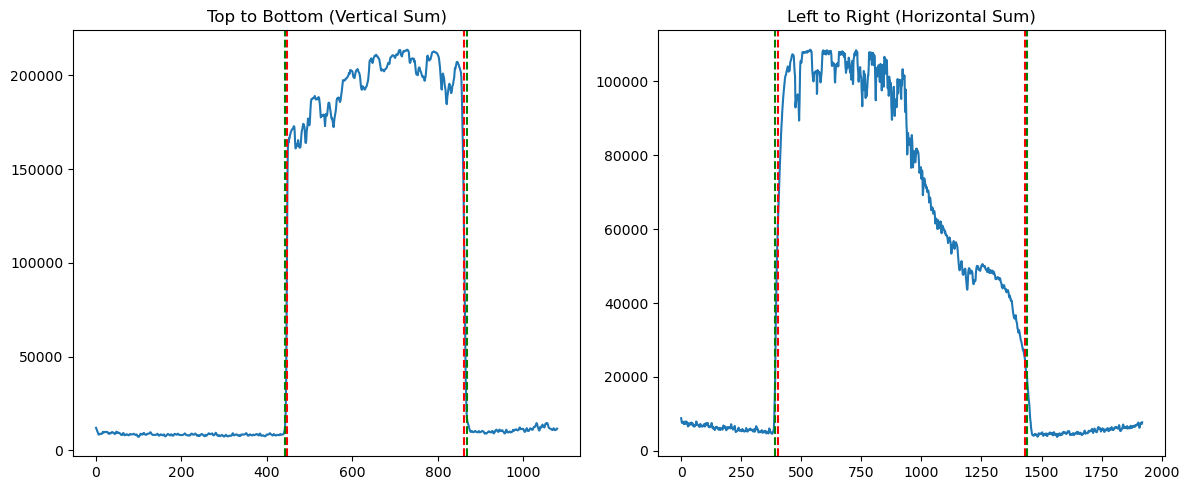

In [51]:
h, w = gray_img.shape
center_y, center_x = h // 2, w // 2

# 각 방향에서 중심선 픽셀 합 구하기
top_line_sums = [np.sum(gray_img[y, :]) for y in range(h)]
bottom_line_sums = [np.sum(gray_img[y, :]) for y in range(h - 1, 0, -1)]
left_line_sums = [np.sum(gray_img[:, x]) for x in range(w)]
right_line_sums = [np.sum(gray_img[:, x]) for x in range(w - 1, 0, -1)]

print("sum of top edge:", np.sum(top_line_sums[edges['top']]))
print("sum of bottom edge:", np.sum(top_line_sums[edges['bottom']]))
print("sum of left edge:", np.sum(left_line_sums[edges['left']]))
print("sum of right edge:", np.sum(left_line_sums[edges['right']]))

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(top_line_sums)
plt.axvline(x=edges["top"], color='red', linestyle='--', label='Edge Top')
plt.axvline(x=edges["bottom"], color='red', linestyle='--', label='Edge Bottom')
plt.axvline(x=line_edges["top"], color='green', linestyle='--', label='LineEdge Top')
plt.axvline(x=line_edges["bottom"], color='green', linestyle='--', label='LineEdge Bottom')
plt.title("Top to Bottom (Vertical Sum)")
plt.subplot(1, 2, 2)
plt.plot(left_line_sums)
plt.axvline(x=edges["left"], color='red', linestyle='--', label='Edge left')
plt.axvline(x=edges["right"], color='red', linestyle='--', label='Edge right')
plt.axvline(x=line_edges["left"], color='green', linestyle='--', label='LineEdge left')
plt.axvline(x=line_edges["right"], color='green', linestyle='--', label='LineEdge right')
plt.title("Left to Right (Horizontal Sum)")
plt.tight_layout()
plt.show()

dot crop
 height: 415 width: 1029
{'top': 446, 'bottom': 861, 'left': 402, 'right': 1431}
line crop
 height: 617 width: 1047
{'top': 443, 'bottom': 1060, 'left': 392, 'right': 1439}


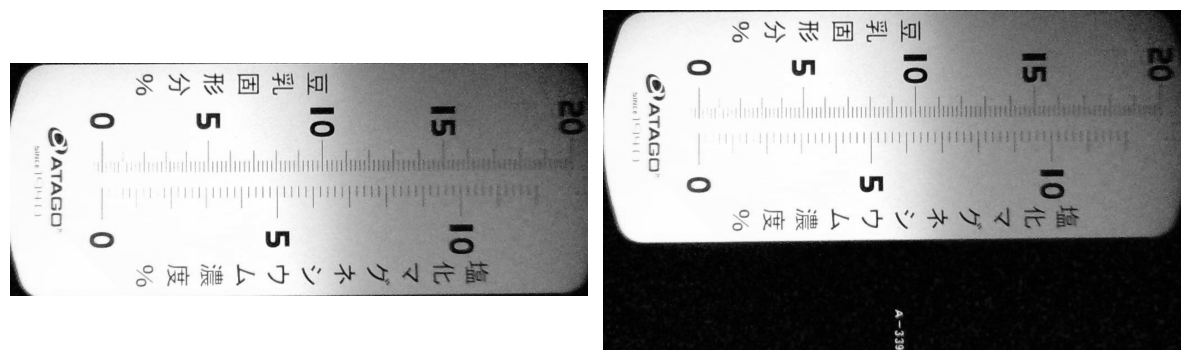

In [40]:
cropped_img = gray_img[edges['top']:edges['bottom'], edges['left']:edges['right']]
line_cropped_img = gray_img[line_edges['top']:line_edges['bottom'], line_edges['left']:line_edges['right']]

print("dot crop\n", "height:", cropped_img.shape[0], "width:", cropped_img.shape[1])
print(edges)
print("line crop\n", "height:", line_cropped_img.shape[0], "width:", line_cropped_img.shape[1])
print(line_edges)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.show()

Line: (563, 448) to (904, 446), Angle: -0.34 degrees
Line: (824, 861) to (1383, 856), Angle: -0.51 degrees
Line: (454, 865) to (844, 862), Angle: -0.44 degrees
Line: (1013, 445) to (1275, 445), Angle: 0.00 degrees
Line: (1038, 858) to (1387, 855), Angle: -0.49 degrees
Average angle: -0.36 degrees
Average angle: -0.36 degrees


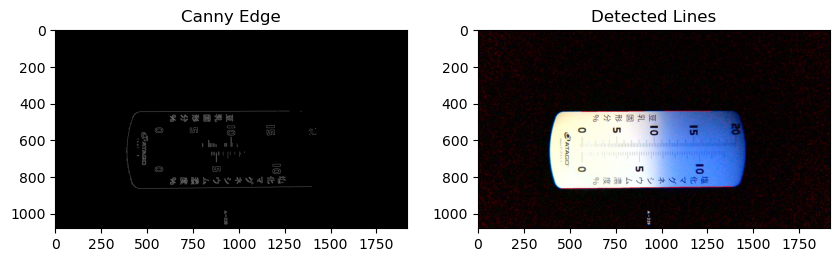

: 

In [ ]:
image_path = os.path.join("yolo_run", 'obb_test.jpg')
image = cv2.imread(image_path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_copy = image.copy()
gray_copy = gray_img.copy()

th1, th2 = 120, 150
hough_th, hough_min, hough_max = 150, 50, 50

blurred = cv2.GaussianBlur(gray_copy, (5, 5), 1.5)
edges = cv2.Canny(blurred, th1, th2, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/360, threshold=hough_th, minLineLength=hough_min, maxLineGap=hough_max)

angles = []
if lines is not None:
    for x1, y1, x2, y2 in lines[:, 0]:
        cv2.line(img_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

        angle_rad = math.atan2((y2 - y1), (x2 - x1))
        angle_deg = math.degrees(angle_rad)
        angles.append(angle_deg)
        print(f"Line: ({x1}, {y1}) to ({x2}, {y2}), Angle: {angle_deg:.2f} degrees")
        
    if angles:
        average_angle = sum(angles) / len(angles)
        print(f"Average angle: {average_angle:.2f} degrees")
        print(f"Average angle: {np.mean(angles):.2f} degrees")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines")
plt.show()

Text(0.5, 1.0, 'Canny Edge')

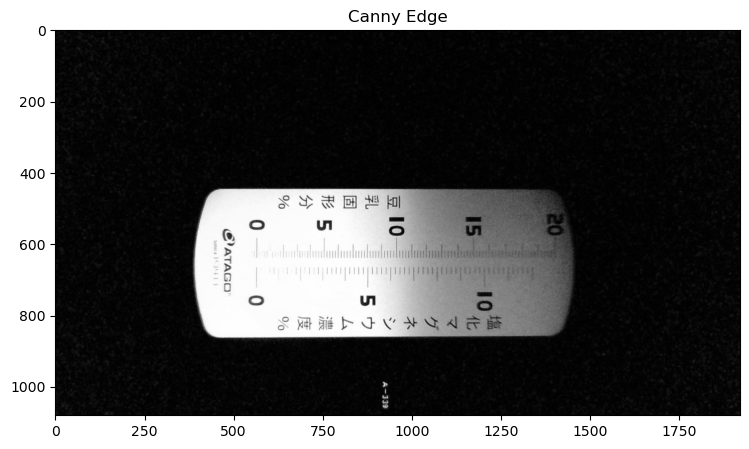

In [42]:
(h, w) = gray_copy.shape[:2]
center = (w // 2, h // 2)

# 평균 각도로 회전 (반시계 방향이 +)
M = cv2.getRotationMatrix2D(center, average_angle, 1.0)
rotated = cv2.warpAffine(gray_copy, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

plt.figure(figsize=(10, 5))
plt.imshow(rotated, cmap="gray")
plt.title("Canny Edge")